# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran..6 
* normally the only thing to adjust in the settings is the subject_list

### External Modules

In [14]:
import sys, os, glob 
sys.path.append(os.path.abspath('../'))
from neuromet.NeuroMet2_dev_fs7 import NeuroMet
from neuromet import scanner_to_bids

In [15]:
from IPython.display import Image
%matplotlib inline

### Settings

In [16]:
## Paths
raw_data_dir = '.' # Directory with files with scanner structure
base_dir = '.'
temp_dir = '.'

#cores
cores = 4
omp_nthreads = 2

In [18]:
# Subject list as $ID$session. i.e. for sub-001/ses-01 '001T01'
subject_list = ['2004T2']

### Copy from raw data

In [19]:
import importlib
importlib.reload(scanner_to_bids)

<module 'neuromet.scanner_to_bids' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET_BIDS/NeuroMET/code/NeuroMET/neuromet/scanner_to_bids.py'>

In [20]:
s2b = scanner_to_bids.ScannerToBIDS(sublist = subject_list,
                   raw_data_dir = raw_data_dir,
                   temp_dir = temp_dir,
                   bids_root=base_dir)

In [21]:
s2bwf = s2b.make_workflow()

In [23]:
s2bwf.run()

210412-15:24:55,56 nipype.workflow INFO:
	 Workflow scanner_to_bids settings: ['check', 'execution', 'logging', 'monitoring']
210412-15:24:55,63 nipype.workflow INFO:
	 Running serially.
210412-15:24:55,64 nipype.workflow INFO:
	 [Node] Setting-up "scanner_to_bids.parse_scanner_dir" in "/home/WorkFlowTemp/NeuroMet2_fs7/scanner_to_bids/_subject_str_2004T2/parse_scanner_dir".
210412-15:24:55,89 nipype.workflow INFO:
	 [Node] Cached "scanner_to_bids.parse_scanner_dir" - collecting precomputed outputs
210412-15:24:55,90 nipype.workflow INFO:
	 [Node] "scanner_to_bids.parse_scanner_dir" found cached.
210412-15:24:55,90 nipype.workflow INFO:
	 [Node] Setting-up "scanner_to_bids.mv_phasediff" in "/home/WorkFlowTemp/NeuroMet2_fs7/scanner_to_bids/_subject_str_2004T2/mv_phasediff".
210412-15:24:55,155 nipype.workflow INFO:
	 [Node] Cached "scanner_to_bids.mv_phasediff" - collecting precomputed outputs
210412-15:24:55,156 nipype.workflow INFO:
	 [Node] "scanner_to_bids.mv_phasediff" found cached.

In [ ]:
# SPM Segment and Mask generation

### Tissue Segmentation Pipeline

In [ ]:
neuromet_creator = NeuroMet(sublist = subject_list,
                            raw_data_dir = raw_data_dir,
                            temp_dir = temp_dir,
                            w_dir = base_dir,
                            omp_nthreads = omp_nthreads,
                           project_prefix = 'ds003427')

In [18]:
neuromet = neuromet_creator.make_neuromet1_workflow()

210311-22:02:09,834 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet.png (graph2use=colored, simple_form=True).


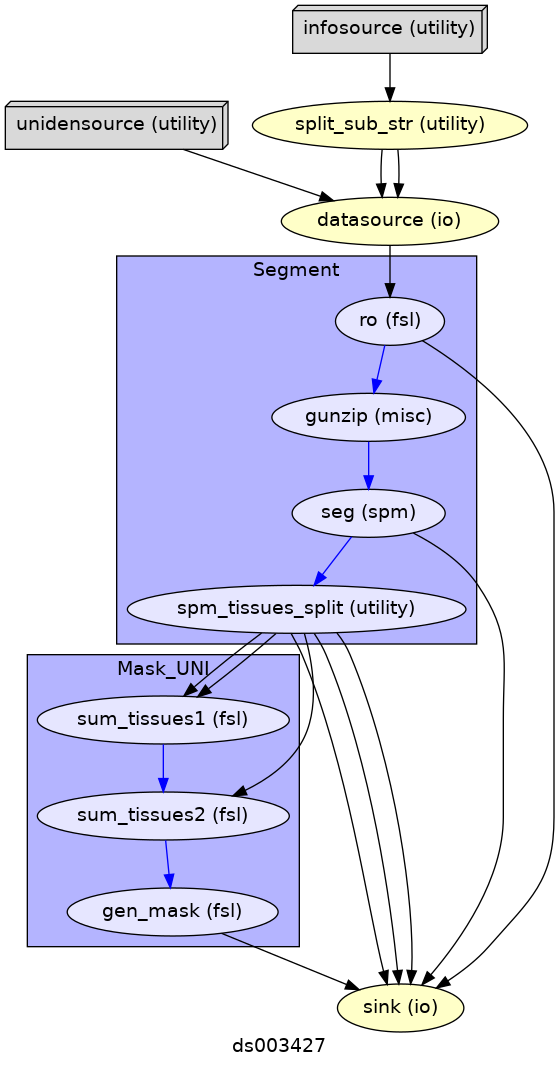

In [19]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet')
Image(filename='./imgs/neuromet.png', width=250)

In [20]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

210311-22:02:13,258 nipype.workflow INFO:
	 Workflow ds003427 settings: ['check', 'execution', 'logging', 'monitoring']
210311-22:02:13,290 nipype.workflow INFO:
	 Running in parallel.
210311-22:02:13,294 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 6.97/6.97, Free processors: 4/4.
210311-22:02:13,409 nipype.workflow INFO:
	 [Job 0] Cached (ds003427.split_sub_str).
210311-22:02:15,297 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 6.97/6.97, Free processors: 4/4.
210311-22:02:15,488 nipype.workflow INFO:
	 [Node] Setting-up "ds003427.datasource" in "/media/orco/home_data/Dokumente/Charitè/NeuroMET/NeuroMet2_structural_analysis/test_data/tmp/ds003427/_subject_id_03T01/_uniden_UNI/datasource".
210311-22:02:15,479 nipype.workflow INFO:
	 [Node] Setting-up "ds003427.datasource" in "/media/orco/home_data/Dokumente/Charitè/NeuroMET/NeuroMet2_structural_analysis/test_data/tmp/ds003427/_subject_id_03T01/_unid

RuntimeError: Workflow did not execute cleanly. Check log for details

test_data/ds003427/sub-03/ses-01/anat/sub-03_ses-01_desc-UNI_MP2RAGE.nii.gz# Combined image and Freesurfer analysis

In [ ]:
print(subject_list)

In [ ]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

In [ ]:
import importlib
from pipeline import NeuroMet2_dev_fs7
importlib.reload(NeuroMet2_dev_fs7)
from pipeline.nodes import qdec
importlib.reload(qdec)

In [ ]:
neuromet_creator = NeuroMet2_dev_fs7.NeuroMet(subject_list,
                                              temp_dir,
                                              w_dir,
                                              omp_nthreads,
                                              raw_data_dir,
                                              overwrite)
neuromet_fs = neuromet_creator.make_neuromet_fs_workflow()

In [ ]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet_fs')
Image(filename='./imgs/neuromet_fs.png')

### Run Freesurfer Analysis

In [ ]:
%%time
neuromet_fs.run('MultiProc', plugin_args={'n_procs': cores})

In [ ]:
# Calculate and Ajust Volumes

In [ ]:
from pipeline.nodes import adj_vol, qdec

In [ ]:
import importlib
importlib.reload(qdec)

In [ ]:
q = qdec.QDec()

In [ ]:
q.inputs.basedir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7'

In [ ]:
q.run().outputs.stats_directory

In [ ]:
import importlib
importlib.reload(adj_vol)

In [ ]:
v = adj_vol.AdjustVolume()

In [ ]:
v.inputs.stats_directory = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'
v.inputs.diag_csv = 